In [1]:
import pandas as pd
import numpy as np
import sklearn
import yellowbrick

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

Data Set

In [2]:
df = pd.DataFrame({
    "ID Buah": pd.Series([1, 2, 3, 4, 5]),
    "Diameter": pd.Series([7.0, 7.1, 6.5, 6.6, 6.8]),
    "Berat": pd.Series([165 , 170, 180, 195, 200])
})

In [3]:
df

,ID Buah,Diameter,Berat
0,1,7.0,165
1,2,7.1,170
2,3,6.5,180
3,4,6.6,195
4,5,6.8,200


Algoritma K-Means

In [4]:
# pemilihan fitur
df_train = df.drop("ID Buah", axis=1)
df_train

,Diameter,Berat
0,7.0,165
1,7.1,170
2,6.5,180
3,6.6,195
4,6.8,200


In [5]:
# Modeling berdasarkan jumlah cluster
n = 2
kmeans_model = KMeans(n_clusters=n, n_init=1, random_state=100).fit(df_train)

In [6]:
df["kluster"] = kmeans_model.labels_
df

,ID Buah,Diameter,Berat,kluster
0,1,7.0,165,0
1,2,7.1,170,0
2,3,6.5,180,1
3,4,6.6,195,1
4,5,6.8,200,1


In [7]:
print(kmeans_model.cluster_centers_)

[[  7.05       167.5       ]
 [  6.63333333 191.66666667]]


In [8]:
kmeans_model_2 = KMeans(n_clusters=2, n_init="auto").fit(df_train)
df2 = df.copy()
df2["kluster"] = kmeans_model_2.labels_
df2

,ID Buah,Diameter,Berat,kluster
0,1,7.0,165,1
1,2,7.1,170,1
2,3,6.5,180,0
3,4,6.6,195,0
4,5,6.8,200,0


# **Pemilihan Jumlah Kluster**

- Menggunakan metode elbow
- Libary bisa apa saja, contoh disini menggunakan yellowbrick cluster

In [15]:
x_array = np.array(df_train)
scaler = MinMaxScaler()
x_scales = scaler.fit_transform(x_array)

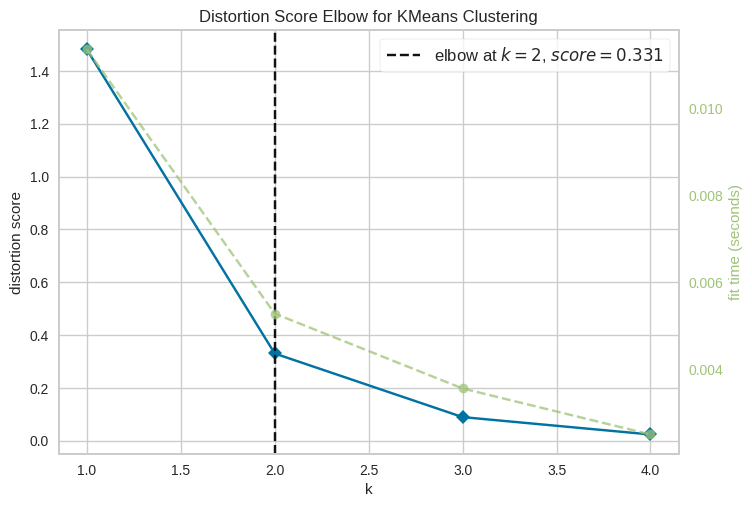

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [19]:
km = KMeans(n_init=1, random_state=100)
visualizer = KElbowVisualizer(km, k=(1,5),timings=True)
visualizer.fit(x_scales)
visualizer.show()

# **Practice**

https://raw.githubusercontent.com/rahmantaufik27/dataset/main/study/student_score_pass.csv

In [28]:
df = pd.read_csv('https://raw.githubusercontent.com/rahmantaufik27/dataset/main/study/student_score_pass.csv')
df

,npm,activeness_score,assignment_score,pre_test_score,post_test_score,midterm_test_score,end_semester_test_score,pass_test
0,2022041101,99,71.0,93.0,52.0,44.0,24,not pass
1,2022041102,96,77.0,NaN,27.0,100.0,89,pass
2,2022041103,86,71.0,84.0,17.0,21.0,41,not pass
3,2022041104,81,96.0,NaN,NaN,11.0,99,not pass
4,2022041105,93,85.0,68.0,29.0,44.0,50,not pass
...,...,...,...,...,...,...,...,...
367,2022041468,91,NaN,31.0,52.0,31.0,46,not pass
368,2022041469,96,87.0,55.0,56.0,95.0,11,pass
369,2022041470,569,83.0,89.0,15.0,86.0,13,not pass
370,2022041471,84,92.0,87.0,97.0,42.0,27,pass


In [51]:
df_train = df.drop("npm", axis=1).drop("pass_test", axis=1)
df_train

,activeness_score,assignment_score,pre_test_score,post_test_score,midterm_test_score,end_semester_test_score,kluster
0,99,71.0,93.0,52.0,44.0,24,0
1,96,77.0,NaN,27.0,100.0,89,0
2,86,71.0,84.0,17.0,21.0,41,0
3,81,96.0,NaN,NaN,11.0,99,0
4,93,85.0,68.0,29.0,44.0,50,0
...,...,...,...,...,...,...,...
367,91,NaN,31.0,52.0,31.0,46,1
368,96,87.0,55.0,56.0,95.0,11,1
369,569,83.0,89.0,15.0,86.0,13,3
370,84,92.0,87.0,97.0,42.0,27,1


In [54]:
n = 2
kmeans_model = KMeans(n_clusters=n, n_init=1, random_state=100).fit(df_train.fillna(0))

In [55]:
df["kluster"] = kmeans_model.labels_
df

,npm,activeness_score,assignment_score,pre_test_score,post_test_score,midterm_test_score,end_semester_test_score,pass_test,kluster
0,2022041101,99,71.0,93.0,52.0,44.0,24,not pass,1
1,2022041102,96,77.0,NaN,27.0,100.0,89,pass,0
2,2022041103,86,71.0,84.0,17.0,21.0,41,not pass,1
3,2022041104,81,96.0,NaN,NaN,11.0,99,not pass,0
4,2022041105,93,85.0,68.0,29.0,44.0,50,not pass,1
...,...,...,...,...,...,...,...,...,...
367,2022041468,91,NaN,31.0,52.0,31.0,46,not pass,0
368,2022041469,96,87.0,55.0,56.0,95.0,11,pass,0
369,2022041470,569,83.0,89.0,15.0,86.0,13,not pass,0
370,2022041471,84,92.0,87.0,97.0,42.0,27,pass,1


In [43]:
print(kmeans_model.cluster_centers_)

[[2.02204114e+09 8.99397590e+01 8.15542169e+01 5.11807229e+01
  5.02289157e+01 5.71927711e+01 5.26746988e+01]
 [2.02204143e+09 8.54415584e+01 8.47142857e+01 6.21428571e+01
  5.37402597e+01 4.78701299e+01 5.78571429e+01]
 [2.02204122e+09 8.94594595e+01 8.27162162e+01 4.44054054e+01
  4.89189189e+01 4.85540541e+01 5.15810811e+01]
 [2.02204138e+09 5.40666667e+02 8.26666667e+01 5.36666667e+01
  4.40000000e+01 6.26666667e+01 2.23333333e+01]
 [2.02204137e+09 9.00178571e+01 8.27142857e+01 3.87678571e+01
  4.29464286e+01 5.11607143e+01 4.90892857e+01]
 [2.02204130e+09 9.08734177e+01 8.56582278e+01 6.11772152e+01
  5.95189873e+01 5.31392405e+01 5.54303797e+01]]


In [56]:
x_array = np.array(df_train.fillna(0))
scaler = MinMaxScaler()
x_scales = scaler.fit_transform(x_array)

/usr/local/lib/python3.10/dist-packages/yellowbrick/utils/kneed.py:156: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/usr/local/lib/python3.10/dist-packages/yellowbrick/cluster/elbow.py:374: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


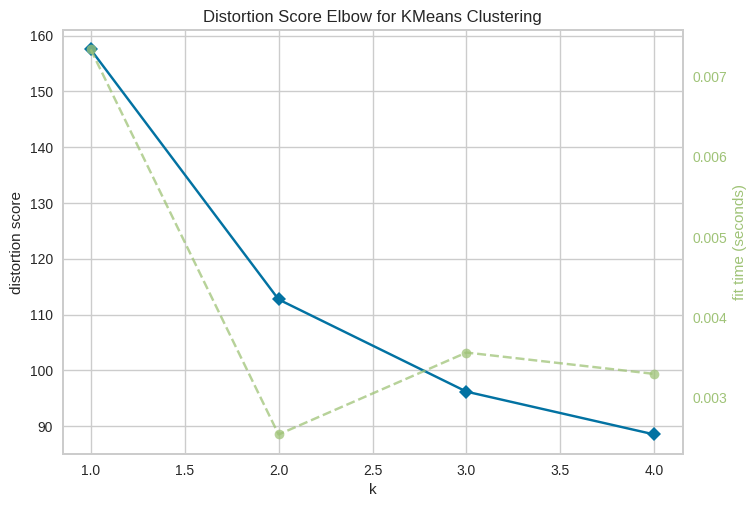

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [57]:
km = KMeans(n_init=1, random_state=100)
visualizer = KElbowVisualizer(km, k=(1,5),timings=True)
visualizer.fit(x_scales)
visualizer.show()